<a href="https://colab.research.google.com/github/11doris/jazz-maestro/blob/colab_word_embeddings/chord_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import gensim
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

### Download Data

Download the file with the input sequences from Google Drive:

In [3]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1H8uRflGJGQecZlmy4jTK8aqKlyc-8C6y' -O input_seq.txt

--2021-10-25 21:29:34--  https://docs.google.com/uc?export=download&id=1H8uRflGJGQecZlmy4jTK8aqKlyc-8C6y
Resolving docs.google.com (docs.google.com)... 173.194.217.100, 173.194.217.102, 173.194.217.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.217.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/id23h0a94csvncnbrgikh6h034afkqf5/1635197325000/14329102864480165501/*/1H8uRflGJGQecZlmy4jTK8aqKlyc-8C6y?e=download [following]
--2021-10-25 21:29:34--  https://doc-14-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/id23h0a94csvncnbrgikh6h034afkqf5/1635197325000/14329102864480165501/*/1H8uRflGJGQecZlmy4jTK8aqKlyc-8C6y?e=download
Resolving doc-14-4c-docs.googleusercontent.com (doc-14-4c-docs.googleusercontent.com)... 173.194.211.132, 2607:f8b0:400c:c10::84
Connecting to doc-14-4c-docs.googleusercontent.com (doc-14

Download the file with the meta data from Google Drive:


In [4]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Gy68KSn98UhfQm9YeRHjP6JsBzlN5z-S' -O input_meta.txt

--2021-10-25 21:29:35--  https://docs.google.com/uc?export=download&id=1Gy68KSn98UhfQm9YeRHjP6JsBzlN5z-S
Resolving docs.google.com (docs.google.com)... 173.194.217.113, 173.194.217.102, 173.194.217.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.217.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8bc66vp618vgk32l8nnltst1d66sbsoh/1635197325000/14329102864480165501/*/1Gy68KSn98UhfQm9YeRHjP6JsBzlN5z-S?e=download [following]
--2021-10-25 21:29:35--  https://doc-0k-4c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8bc66vp618vgk32l8nnltst1d66sbsoh/1635197325000/14329102864480165501/*/1Gy68KSn98UhfQm9YeRHjP6JsBzlN5z-S?e=download
Resolving doc-0k-4c-docs.googleusercontent.com (doc-0k-4c-docs.googleusercontent.com)... 173.194.211.132, 2607:f8b0:400c:c10::84
Connecting to doc-0k-4c-docs.googleusercontent.com (doc-0k

In [15]:
path_to_file = '/content/input_seq.txt'

with open(path_to_file) as f: 
  lines = f.read().splitlines()

In [16]:
data = [line.split(' ') for line in lines]

In [106]:
print(data)

[['CM7,', 'Eb7', 'G#M7,', 'B7', 'EM7,', 'G7', 'Gm7,', 'C7', 'FM7,', 'G#7', 'C#M7,', 'E7', 'Am7,', 'D7', 'Dm7,', 'G7', 'CM7,', 'Eb7', 'G#M7,', 'B7', 'EM7,', 'G7', 'Gm7,', 'C7', 'FM7,', 'Eb7', 'G#M7,', 'B7', 'EM7,', 'G7', 'CM7', 'Gm7,', 'C7', 'Bm7,', 'E7', 'AM7,', 'C7', 'FM7', 'Bbm7', 'Eb7', 'G#M7', 'Dm7,', 'G7', 'CM7,', 'Eb7', 'G#M7,', 'B7', 'EM7,', 'G7', 'Gm7,', 'C7', 'FM7,', 'Eb7', 'G#M7,', 'B7', 'EM7,', 'G7', 'CM7'], ['Am7', 'Am7', 'Cm7', 'Cm7', 'EbM7', 'EbM7', 'Em7b5', 'A7(+#9)', 'Dm7', 'Dm7', 'Bm7b5', 'Bm7b5', 'Bbm7', 'Bbm7', 'Fm7', 'Fm7', 'E7(+#9)', 'E7(+#9)', 'Fm7', 'Fm7', 'C#M7', 'C#M7', 'Fm7', 'Fm7', 'C#M7', 'C#M7'], ['Am7', 'C#M7', 'Bm7b5', 'E7(+#9)', 'Am7', 'C#M7', 'Bm7b5', 'E7(+#9)', 'Cm7', 'F7(+b9)', 'BbM7', 'G#m7,', 'C#7', 'F#m7b5', 'B7(+b9)', 'EaugM7', 'EaugM7,', 'E7', 'Am7', 'C#M7', 'Bm7b5', 'E7(+#9)', 'Am7', 'C#M7', 'Bm7b5', 'E7(+#9)', 'Cm7', 'F7(+b9)', 'BbM7', 'G#m7,', 'C#7', 'F#m7b5', 'B7(+b9)', 'Em7', 'Em7'], ['C,', 'Am7', 'Dm7,', 'G7', 'C,', 'Am7', 'Dm7,', 'G7', 'C,

## Train Model

In [107]:
# train model
model = gensim.models.Word2Vec(data, min_count=1)

In [108]:
# summarize the loaded model
print(model)

Word2Vec(vocab=780, size=100, alpha=0.025)


In [109]:
# summarize vocabulary
words = model.wv.index2word
print(words)

['G7', 'C', 'Dm7,', 'D7', 'A7', 'Dm7', 'CM7', 'C7', 'Am7', 'C,', 'F', 'CM7,', 'E7', 'C6', 'Em7,', 'Am', 'F7', 'FM7', 'Bb7', 'C6,', 'Am7,', 'E7(+b9)', 'Em7', 'B7', 'A7(+b9)', 'D7,', 'Gm7,', 'Bm7b5,', 'G7,', 'G#7', 'Dm', 'F,', 'Fm', 'Ebdim7', 'Am,', 'G', 'FM7,', 'Fm7', 'Gm7', 'Eb7', 'G7(+b9)', 'Fm7,', 'F#m7b5,', 'G7sus4', 'Bm7b5', 'Am6', 'Fm6', 'Gaug', 'C7,', 'Em', 'B7(+b9)', 'F7,', 'Em7b5,', 'C#7', 'F#dim7', 'C#dim7', 'Cm7', 'BbM7', 'Gaug7', 'Bm7', 'G#M7', 'F#m7,', 'G#7,', 'Ebdim', 'Em7b5', 'F#m7b5', 'F6', 'F#dim', 'EbM7', 'F#7', 'Bm7,', 'E7,', 'A7,', 'Dm,', 'Ebm7,', 'G,', 'C#M7', 'D9', 'Dm7b5', 'F#m7', 'Cdim', 'Bb', 'C#dim', 'E7(+b13)', 'Bb7,', 'G9', 'D', 'Cm7,', 'EM7', 'B7,', 'Cm', 'Dm7b5,', 'E7(+#9)', 'F6,', 'AM7', 'Em,', 'Am11', 'Bb7(+#11)', 'GM7', 'Ebm7', 'C#m7', 'Bbm7,', 'G13', 'DM7', 'Bbm7', 'Am9', 'G#M7,', 'Bb9', 'E', 'G#', 'C#m7,', 'EM7,', 'Eaug7', 'G7sus4,', 'A7(+#9)', 'Dm6', 'F7(+#11)', 'G#m7,', 'A7(+b13)', 'C7sus4', 'Eb', 'C7(+b9)', 'Dm9', 'Cdim7', 'F9', 'BM7', 'Caug', 'Aaug

In [110]:
print(model.wv['G7'])

[-0.5512474  -0.97113776 -0.535017   -0.30288348 -0.08792802  0.5060137
 -0.16308013 -0.0821872   0.574289   -0.2616593   0.32519543 -0.1099832
 -0.16744256 -0.22285509 -0.03455786  0.5882693  -0.11046513 -0.2265281
  0.15374307  0.8715676  -0.7232226   0.19008937 -0.29670268  0.00202122
 -0.00599637 -0.4665373   0.28387746  0.16755775  0.44716468  0.33214307
 -0.8962052  -0.14804097  0.5230209  -0.3137476  -0.49348515 -0.40396917
 -0.1594781  -0.55299985 -0.10692596 -0.26560882 -0.8521522  -0.40962753
  0.44395837 -0.77245176  0.5388538  -0.6563549   0.03384054  1.0088003
  0.41684973 -0.1878293  -0.22029439 -0.4365195  -0.09510925  0.29474804
 -0.39538452  0.01376077  0.76140773  0.99997574 -0.15880622 -0.38881913
  1.2054597   0.12771533 -0.3853544   0.26322576  0.032101   -0.0227386
  0.12654582  0.13589443  0.46490738 -0.17000605  0.48522973 -0.0971764
 -0.4576929  -0.700543    0.38246924 -0.33409113  0.2912142  -0.41191465
  0.5116684  -0.6154943  -0.01184685 -0.41758037  0.46323

In [111]:
# Finding most similar words
words = model.wv.most_similar("CM7", topn=3)
for word in words:
  print(word)
print()

('Dm7', 0.8881454467773438)
('Dm7b5', 0.8384054899215698)
('FM7', 0.8333624005317688)



In [112]:
print(model.wv.similarity('C6', 'CM7'))


0.69518304


Get the word2vec weights:

In [113]:
# input
model.wv.vectors.shape

(780, 100)

In [114]:
model.wv.vectors

array([[-5.5124742e-01, -9.7113776e-01, -5.3501701e-01, ...,
         2.4198151e-01, -4.3688095e-01, -6.4167343e-02],
       [-7.6904696e-01, -1.2438533e+00, -1.2423477e+00, ...,
         2.6139516e-01, -4.8075032e-01, -9.5905668e-01],
       [-4.8576036e-01, -7.1930403e-01, -3.1785017e-01, ...,
         1.7331496e-01, -3.5829705e-01,  5.0147110e-01],
       ...,
       [-5.0030984e-03, -1.0868188e-02, -1.8895932e-02, ...,
         1.5055842e-04, -5.3240117e-03, -1.6352726e-02],
       [ 2.9228802e-03, -2.2033150e-03, -1.6370747e-02, ...,
        -1.6705863e-03,  4.0149270e-03, -6.0246517e-03],
       [-1.8463630e-03, -2.2564447e-03, -2.0807929e-02, ...,
        -6.0831127e-03,  5.8391173e-03, -7.2146896e-03]], dtype=float32)

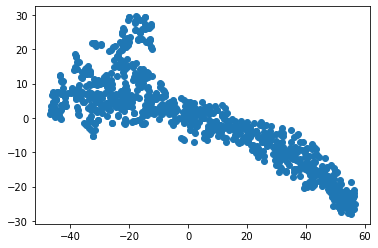

In [115]:
X = model.wv[model.wv.vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

In [116]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=20, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

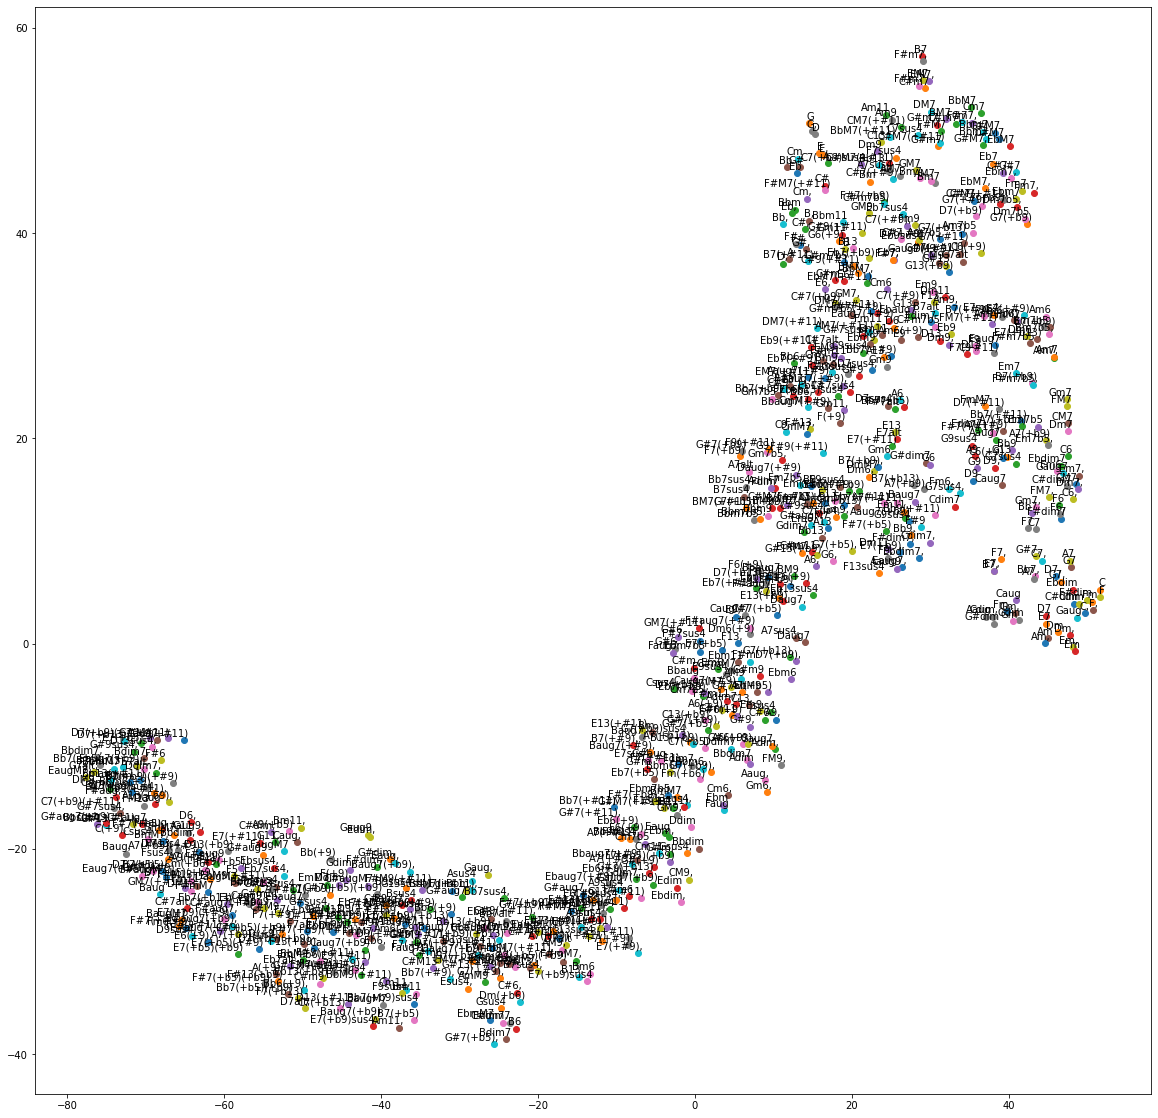

In [117]:
tsne_plot(model)

## Doc2Vec Example Code from gensim

### Core Concepts 

In [139]:
text_corpus = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

In [140]:
path_to_file = '/content/input_seq.txt'

#with open(path_to_file) as f: 
#  text_corpus = f.read().splitlines()

In [141]:
import pprint

# Create a set of frequent words
stoplist = set('for a of the and to in'.split(' '))
# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in stoplist]
#texts = [[word for word in document.split()]
         for document in text_corpus]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
pprint.pprint(processed_corpus[0:5])

[['interface', 'computer'],
 ['A', 'survey', 'of', 'user', 'of', 'computer', 'system', 'response', 'time'],
 ['The', 'EPS', 'user', 'interface', 'system'],
 ['and', 'system', 'of', 'EPS'],
 ['of', 'user', 'response', 'time']]


Before proceeding, we want to associate each word in the corpus with a unique integer ID. We can do this using the `gensim.corpora.Dictionary` class. This dictionary defines the vocabulary of all words that our processing knows about.

In [142]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

Dictionary(15 unique tokens: ['computer', 'interface', 'A', 'of', 'response']...)


In [143]:
pprint.pprint(dictionary.token2id)

{'A': 2,
 'EPS': 9,
 'Graph': 13,
 'The': 10,
 'and': 11,
 'computer': 0,
 'interface': 1,
 'minors': 14,
 'of': 3,
 'response': 4,
 'survey': 5,
 'system': 6,
 'time': 7,
 'trees': 12,
 'user': 8}


In [144]:
new_doc = "Human computer interaction"
new_vec = dictionary.doc2bow(new_doc.lower().split())
print(new_vec)

[(0, 1)]


In [145]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
pprint.pprint(bow_corpus[0:3])

[[(0, 1), (1, 1)],
 [(0, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(1, 1), (6, 1), (8, 1), (9, 1), (10, 1)]]


In [146]:
from gensim import models

# train the model
tfidf = models.TfidfModel(bow_corpus)

# transform the "system minors" string
words = "system minors".lower().split()
print(tfidf[dictionary.doc2bow(words)])

[(6, 0.5898341626740045), (14, 0.8075244024440723)]


In [147]:
from gensim import similarities

index = similarities.SparseMatrixSimilarity(tfidf[bow_corpus], num_features=12)

In [ ]:
query_document = 'system engineering'.split()
query_bow = dictionary.doc2bow(query_document)
sims = index[tfidf[query_bow]]
print(list(enumerate(sims)))

Document 3 has a similarity score of 0.718=72%, document 2 has a similarity score of 42% etc.

In [ ]:
for document_number, score in sorted(enumerate(sims), key=lambda x: x[1], reverse=True):
    print(document_number, score)

### Corpora and Vector Spaces

In [80]:
documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

In [81]:
from pprint import pprint  # pretty-printer
from collections import defaultdict

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

pprint(texts)

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]


In [82]:
from gensim import corpora
dictionary = corpora.Dictionary(texts)
print(dictionary)

Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...)


In [83]:
print(dictionary.token2id)

{'computer': 0, 'human': 1, 'interface': 2, 'response': 3, 'survey': 4, 'system': 5, 'time': 6, 'user': 7, 'eps': 8, 'trees': 9, 'graph': 10, 'minors': 11}


In [84]:
new_doc = "Human computer interaction"
new_vec = dictionary.doc2bow(new_doc.lower().split())
print(new_vec)  # the word "interaction" does not appear in the dictionary and is ignored

[(0, 1), (1, 1)]


In [85]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('/tmp/deerwester.mm', corpus)  # store to disk, for later use
print(corpus)

[[(0, 1), (1, 1), (2, 1)], [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)], [(2, 1), (5, 1), (7, 1), (8, 1)], [(1, 1), (5, 2), (8, 1)], [(3, 1), (6, 1), (7, 1)], [(9, 1)], [(9, 1), (10, 1)], [(9, 1), (10, 1), (11, 1)], [(4, 1), (10, 1), (11, 1)]]


### Topics and Transformations

In [86]:
from collections import defaultdict
from gensim import corpora

documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [87]:
from gensim import models

tfidf = models.TfidfModel(corpus)  # step 1 -- initialize a model

In [88]:
doc_bow = [(0, 1), (1, 1)]
print(tfidf[doc_bow])  # step 2 -- use the model to transform vectors

[(0, 0.7071067811865476), (1, 0.7071067811865476)]


In [89]:
corpus_tfidf = tfidf[corpus]
for doc in corpus_tfidf:
    print(doc)

[(0, 0.5773502691896257), (1, 0.5773502691896257), (2, 0.5773502691896257)]
[(0, 0.44424552527467476), (3, 0.44424552527467476), (4, 0.44424552527467476), (5, 0.3244870206138555), (6, 0.44424552527467476), (7, 0.3244870206138555)]
[(2, 0.5710059809418182), (5, 0.4170757362022777), (7, 0.4170757362022777), (8, 0.5710059809418182)]
[(1, 0.49182558987264147), (5, 0.7184811607083769), (8, 0.49182558987264147)]
[(3, 0.6282580468670046), (6, 0.6282580468670046), (7, 0.45889394536615247)]
[(9, 1.0)]
[(9, 0.7071067811865475), (10, 0.7071067811865475)]
[(9, 0.5080429008916749), (10, 0.5080429008916749), (11, 0.695546419520037)]
[(4, 0.6282580468670046), (10, 0.45889394536615247), (11, 0.6282580468670046)]


In [90]:
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2)  # initialize an LSI transformation
corpus_lsi = lsi_model[corpus_tfidf]  # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

In [91]:
lsi_model.print_topics(2)

[(0,
  '0.703*"trees" + 0.538*"graph" + 0.402*"minors" + 0.187*"survey" + 0.061*"system" + 0.060*"time" + 0.060*"response" + 0.058*"user" + 0.049*"computer" + 0.035*"interface"'),
 (1,
  '-0.460*"system" + -0.373*"user" + -0.332*"eps" + -0.328*"interface" + -0.320*"time" + -0.320*"response" + -0.293*"computer" + -0.280*"human" + -0.171*"survey" + 0.161*"trees"')]

In [92]:
# both bow->tfidf and tfidf->lsi transformations are actually executed here, on the fly
for doc, as_text in zip(corpus_lsi, documents):
    print(doc, as_text)

[(0, 0.06600783396090956), (1, -0.520070330636184)] Human machine interface for lab abc computer applications
[(0, 0.196675928591434), (1, -0.7609563167700025)] A survey of user opinion of computer system response time
[(0, 0.08992639972447275), (1, -0.7241860626752497)] The EPS user interface management system
[(0, 0.075858476521789), (1, -0.6320551586003416)] System and human system engineering testing of EPS
[(0, 0.10150299184980818), (1, -0.5737308483002946)] Relation of user perceived response time to error measurement
[(0, 0.7032108939378288), (1, 0.16115180214026648)] The generation of random binary unordered trees
[(0, 0.8774787673119808), (1, 0.16758906864660478)] The intersection graph of paths in trees
[(0, 0.909862468681856), (1, 0.14086553628720122)] Graph minors IV Widths of trees and well quasi ordering
[(0, 0.616582535056929), (1, -0.05392907566388623)] Graph minors A survey


In [93]:
model = models.TfidfModel(corpus, normalize=True)

In [95]:
model = models.LdaModel(corpus, id2word=dictionary, num_topics=100)

### Similarity Queries

In [17]:
from collections import defaultdict
from gensim import corpora

documents = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

In [18]:
path_to_file = '/content/input_seq.txt'

#with open(path_to_file) as f: 
#  documents = f.read().splitlines()

In [19]:


# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [
    [word for word in document.lower().split() if word not in stoplist]         
  #  [word for word in document.split()]
    for document in documents
]

# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [23]:
from gensim import models
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)

In [24]:
doc = "Human computer interaction"
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
print(vec_lsi)

[(0, 0.4618210045327166), (1, -0.07002766527899977)]


In [25]:
from gensim import similarities
index = similarities.MatrixSimilarity(lsi[corpus])  # transform corpus to LSI space and index it

In [26]:
sims = index[vec_lsi]  # perform a similarity query against the corpus
print(list(enumerate(sims)))  # print (document_number, document_similarity) 2-tuples

[(0, 0.998093), (1, 0.93748635), (2, 0.9984453), (3, 0.98658866), (4, 0.90755945), (5, -0.12416792), (6, -0.1063926), (7, -0.09879464), (8, 0.05004177)]


In [27]:
sims = sorted(enumerate(sims), key=lambda item: -item[1])
for doc_position, doc_score in sims:
    print(doc_score, documents[doc_position])

0.9984453 The EPS user interface management system
0.998093 Human machine interface for lab abc computer applications
0.98658866 System and human system engineering testing of EPS
0.93748635 A survey of user opinion of computer system response time
0.90755945 Relation of user perceived response time to error measurement
0.05004177 Graph minors A survey
-0.09879464 Graph minors IV Widths of trees and well quasi ordering
-0.1063926 The intersection graph of paths in trees
-0.12416792 The generation of random binary unordered trees


## Similarity Chords


In [33]:
path_to_file = '/content/input_seq.txt'

with open(path_to_file) as f: 
  documents = f.read().splitlines()

In [34]:
# tokenize
texts = [
         [word for word in document.split()]
         for document in documents
]
len(texts)

2053

In [35]:
# Count word frequencies
from collections import defaultdict
from gensim import corpora


# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

len(texts)

2053

In [37]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [47]:
dictionary.token2id


{'A': 205,
 'A(+9)': 202,
 'A13': 110,
 'A13(+b9)': 377,
 'A6': 287,
 'A6(+9)': 358,
 'A7': 35,
 'A7(+#11)': 268,
 'A7(+#9)': 18,
 'A7(+b13)': 84,
 'A7(+b5)': 324,
 'A7(+b5)(+#9)': 156,
 'A7(+b5)(+b9)': 93,
 'A7(+b9)': 49,
 'A7(+b9)(+#11)': 391,
 'A7(+b9)sus4': 94,
 'A7alt': 191,
 'A7sus4': 147,
 'A9': 200,
 'A9(+b5)': 371,
 'A9sus4': 309,
 'AM7': 0,
 'AM7(+#11)': 250,
 'AM9': 235,
 'Aaug': 431,
 'Aaug7': 214,
 'Aaug7(+#9)': 292,
 'Aaug7(+b9)': 95,
 'Aaug9': 290,
 'Adim': 50,
 'Adim7': 230,
 'Am': 101,
 'Am(+b6)': 300,
 'Am11': 173,
 'Am6': 176,
 'Am6(+9)': 273,
 'Am7': 1,
 'Am7b5': 88,
 'Am9': 133,
 'AmM7': 121,
 'AmM9': 374,
 'Asus4': 334,
 'B': 106,
 'B11': 343,
 'B13': 331,
 'B13(+b9)': 378,
 'B6': 370,
 'B7': 2,
 'B7(+#11)': 322,
 'B7(+#9)': 145,
 'B7(+b13)': 122,
 'B7(+b5)': 306,
 'B7(+b9)': 25,
 'B7alt': 305,
 'B7sus4': 297,
 'B9': 260,
 'B9sus4': 367,
 'BM7': 51,
 'BM7(+#11)': 126,
 'BM9': 336,
 'Baug': 434,
 'Baug7': 174,
 'Baug7(+#9)': 333,
 'Baug7(+b9)': 365,
 'Bb': 36,
 'Bb

In [49]:
from gensim import models
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=5)

In [50]:
documents[0]

'CM7 Eb7 G#M7 B7 EM7 G7 Gm7 C7 FM7 G#7 C#M7 E7 Am7 D7 Dm7 G7 CM7 Eb7 G#M7 B7 EM7 G7 Gm7 C7 FM7 Eb7 G#M7 B7 EM7 G7 CM7 Gm7 C7 Bm7 E7 AM7 C7 FM7 Bbm7 Eb7 G#M7 Dm7 G7 CM7 Eb7 G#M7 B7 EM7 G7 Gm7 C7 FM7 Eb7 G#M7 B7 EM7 G7 CM7'

In [51]:
doc = documents[0]
vec_bow = dictionary.doc2bow(doc.split())
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
print(vec_lsi)

[(0, 7.267516430148476), (1, 5.86651350407484), (2, 0.22466150142907967), (3, -0.6185206367626415), (4, 1.9052115829241967)]


In [52]:
from gensim import similarities
index = similarities.MatrixSimilarity(lsi[corpus])  # transform corpus to LSI space and index it

In [53]:
sims = index[vec_lsi]  # perform a similarity query against the corpus
print(list(enumerate(sims)))  # print (document_number, document_similarity) 2-tuples

[(0, 1.0), (1, 0.6017556), (2, 0.28499952), (3, 0.6797409), (4, 0.73857546), (5, 0.9561808), (6, 0.9618883), (7, 0.83239824), (8, 0.96750176), (9, 0.81926244), (10, 0.7948507), (11, 0.78424305), (12, 0.62336904), (13, 0.95913637), (14, 0.9700872), (15, 0.96277356), (16, 0.7961498), (17, 0.90661967), (18, 0.5333898), (19, 0.8934071), (20, 0.8380515), (21, 0.94578606), (22, 0.29623497), (23, 0.71325845), (24, 0.9302236), (25, 0.3254989), (26, 0.7559414), (27, 0.9343842), (28, 0.9082838), (29, 0.938006), (30, 0.9223185), (31, 0.9053888), (32, 0.91381335), (33, 0.64163417), (34, 0.44372186), (35, 0.8865223), (36, 0.34676), (37, 0.6133525), (38, 0.9374654), (39, 0.8686811), (40, 0.9203551), (41, 0.9662888), (42, 0.3608484), (43, 0.9323549), (44, 0.67441595), (45, 0.6070935), (46, 0.82376873), (47, 0.30765995), (48, 0.66593707), (49, 0.87265414), (50, 0.29244035), (51, 0.90704036), (52, 0.9597073), (53, 0.46863195), (54, 0.71303946), (55, 0.52179), (56, 0.90623367), (57, 0.955148), (58, 0.88

In [54]:
sims = sorted(enumerate(sims), key=lambda item: -item[1])
for doc_position, doc_score in sims:
    print(doc_score, documents[doc_position])

1.0 CM7 Eb7 G#M7 B7 EM7 G7 Gm7 C7 FM7 G#7 C#M7 E7 Am7 D7 Dm7 G7 CM7 Eb7 G#M7 B7 EM7 G7 Gm7 C7 FM7 Eb7 G#M7 B7 EM7 G7 CM7 Gm7 C7 Bm7 E7 AM7 C7 FM7 Bbm7 Eb7 G#M7 Dm7 G7 CM7 Eb7 G#M7 B7 EM7 G7 Gm7 C7 FM7 Eb7 G#M7 B7 EM7 G7 CM7
0.99722135 G#7 G7 G#7 G7 CM7 CM7 G#7 G7 G#7 G7 CM7 CM7 Gm7 C7 Gm7 C7 Gm7 C7 FM7 Am7 D7 Am7 D7 Dm7 G7 G#7 G7 G#7 G7 CM7 CM7 C7 C7 FM7 FM7 FM7 Fm7 Em7b5 A7 G#7 G7 G#7 G7 CM7 CM7
0.995403 CM7 B7 Bb9 A7 Dm7 G7 CM7 Cdim7 CM7 Eaug7 F6 G7 CM7 E7 Am7 C7 FM7 C#dim7 Dm7 G9 G7 G7 Em7 A7 Dm7 G7 CM7 B7 Bb9 A7 Dm7 G7 CM7 Cdim7 CM7 Am7 Bm7 E7 Am7 G#dim7 Gm7 C9 FM7 F#dim7 C G#7 G7 G7 Em7b5 Bb9(+#11) A7 Aaug7 Dm7 Dm7 G13(+b9) C6(+9) Dm7 G7
0.994701 CM7 Dm7 G7 CM7 Dm7 G7 Am7 D7 G7 Am7 D7 G7 CM7 Dm7 G7 CM7 C7 FM7 G7 CM7 A7 Dm7 G7 CM7 C7 Bm7b5 E7 Am7 Am7 D7 G7 CM7 Dm7 G7 Em7b5 A7 Dm7 Dm7 G7 CM7 CM7
0.9876624 Dm7 G7 CM7 F7 Em7 A7(+b9) Dm7 G7 CM7 G7 CM7 Bm7b5 E7(+b9) Am Am Am7 D7 Am7 D7 Dm7 G7 Dm7 G7 CM7 F7 Em7 A7(+b9) Dm7 G7 C7 Gm7 C7 FM7 Bb7 CM7 Ebdim7 Dm7 G7 C6 Em7 A7
0.9868919 CM7 C#